# Regression

## Introduction to Regression

Single Linear Regression: One-dimensional Regression  
Multiple Linear Regression: Multi-dimensional Regression  
Ridge Regression: Add L2 Regularization > make large coefficient values smaller  
Lasso Regression: Add L1 Regularization > make small coefficient values to 0(a.k.a. Feature selection)  
ElasticNet: Add L1&L2 Regularization  
Logistic Regression: Seems to Classification

MAE(Mean Absolute Error): mean of absolute value of errors  
RSS(Residual Sum of Error): mean of squared error  

## Gradient Descent

If there are less features, we can use multi-dimensional equation to find regression coefficents. However, as feature get bigger, it's difficult to calculate regression coefficients by equtation. But Gradient Descent(GD) can!  
  
Gradinet Descent: By repetitive calculation, update parameter values to make min error value  

Shape of X: (100, 1)
Shape of y: (100, 1)


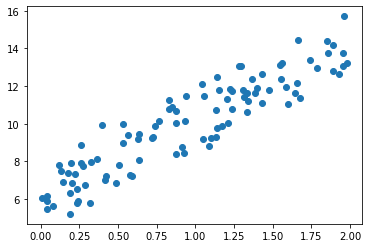

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# we want to make random value from y=4x+6
X = 2*np.random.rand(100,1)
print('Shape of X:', X.shape)
y = 6+4*X + np.random.randn(100,1)
print('Shape of y:', y.shape)

plt.scatter(X,y)

In [56]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [57]:
w1 = np.array([[1,2],[3,4]])
w1.T

array([[1, 3],
       [2, 4]])

In [58]:
np.zeros((1,1))

array([[0.]])

In [59]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)      # number of data
    F = X.shape[1]  # number of feature

    # Initialization w1_updated & w0_updated as same size as w1 & w0 with 0 values
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1) + w0   # Calculate prediction matrix
    diff = y - y_pred               # Calculate diff between prediction and actual value
    
    w1_update = (-2/N)*learning_rate*np.dot(X.T, diff)  #shape of w1: (# of features, 1)
    w0_update = (-2/N)*learning_rate*np.sum(diff)       #shape of w0: (1, 1)

    return w1_update, w0_update

def gradient_descent_steps(X, y, iters=10000, learning_rate=0.01):
    
    w1 = np.zeros((X.shape[1],1)) #shape: (# of features, 1)
    w0 = np.zeros((1, 1))         #shape: (1, 1)

    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=learning_rate)
        w1 -= w1_update
        w0 -= w0_update
    
    return w1, w0

In [60]:
w1, w0 = gradient_descent_steps(X, y, iters=1000, learning_rate=0.01)
print('w0: {:4f}'.format(w0[0,0]))
print('w1:')
print(w1)

y_pred = np.dot(X,w1)+w0
cost = get_cost(y, y_pred)
print('Gradient Descent Total Cost: {:4f}'.format(cost))

w0: 6.162031
w1:
[[4.02181364]]
Gradient Descent Total Cost: 0.993478


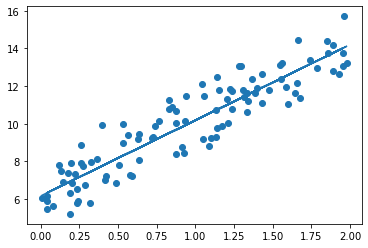

In [61]:
plt.scatter(X,y)
plt.plot(X, y_pred)

### Stochastic Gradient Descent(SGD)

In [62]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=10000, learning_rate=0.01):
    
    w1 = np.zeros((X.shape[1],1)) #shape: (# of features, 1)
    w0 = np.zeros((1, 1))         #shape: (1, 1)
    prev_cost = 100000
    iter_index=0

    for i in range(iters):
        stochastic_random_index = np.random.permutation(X.shape[0]) #Shuffle index of X
        sample_X = X[stochastic_random_index[0:batch_size]]         #Sampling X by batchsize
        sample_y = y[stochastic_random_index[0:batch_size]]         #Sampling y by batchsize

        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=learning_rate)
        w1 -= w1_update
        w0 -= w0_update
    
    return w1, w0

In [63]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000, batch_size=10, learning_rate=0.01)
print('w0: {:4f}'.format(w0[0,0]))
print('w1:')
print(w1)

y_pred = np.dot(X,w1)+w0
cost = get_cost(y, y_pred)
print('Stochastic Gradient Descent Total Cost: {:4f}'.format(cost))

w0: 6.137259
w1:
[[4.00668731]]
Stochastic Gradient Descent Total Cost: 0.995301


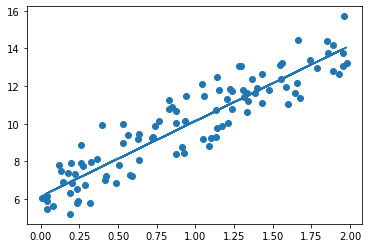

In [64]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [79]:
# we want to make random value from y= 5w1 - 4w2 + 4
X = np.concatenate((2*np.random.rand(1000,1), 3*np.random.rand(1000,1)), axis=1)
print('Shape of X:', X.shape)
w = np.array([[5],[-4]])
y = 4 + np.dot(X,w) + np.random.randn(1000,1)
print('Shape of y:', y.shape)


Shape of X: (1000, 2)
Shape of y: (1000, 1)


In [80]:
w1, w0 = gradient_descent_steps(X, y, iters=5000, learning_rate=0.05)
print('w0: {:4f}'.format(w0[0,0]))
print('w1:')
print(w1)

y_pred = np.dot(X,w1)+w0
cost = get_cost(y, y_pred)
print('Gradient Descent Total Cost: {:4f}'.format(cost))

w0: 3.888133
w1:
[[ 5.01725428]
 [-3.94735334]]
Gradient Descent Total Cost: 0.974396


## Boston Housing Price Prediction Example

check sklearn linear_models module  
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

### LinearRegression Class - Ordinary Least Squares  

OLS(Ordinary Least Squares): Minimize RSS  
Input Hyperparameters:  
1. fit_intercept[Default=True]: Decide the use of intercept(w0)  
2. normalize[Default=False]: If true Normalize Datasets  
  
Attributes:  
1. coef_: after executing fit() method, coefficents are loaded. coef_.shape = (# of data, # of features)  
2. intercept_: value of intercept

Multi-Colinearity: High Corelation between features  
To solve Multi_colinearity, we left the most important feature and delete(or regulate) other features.  
Or we can consider Dimension Reduction by PCA

### Regression Evaluation Indicators

MAE: Mean Absolute Error(in sklearn.metrics, mean_absolute_error)(in hyperparameter scoring=, neg_mean_absolute_error)  
MSE: Mean Squared Error(in sklearn.metrics, mean_squared_error)(in hyperparameter scoring=, neg_mean_squared_error)  
RMSE: Root Mean Squared Error  
R_squared: Prediction Variance/Actual Variance(in sklearn, metrics.r2_score)(in hyperparameter scoring=, r2)

### Boston Housing Price Prediction by LinearRegression

In [9]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

boston = load_boston()

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target
print('Shape of Boston Housing Dataset:', boston_df.shape)
boston_df.head()

Shape of Boston Housing Dataset: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

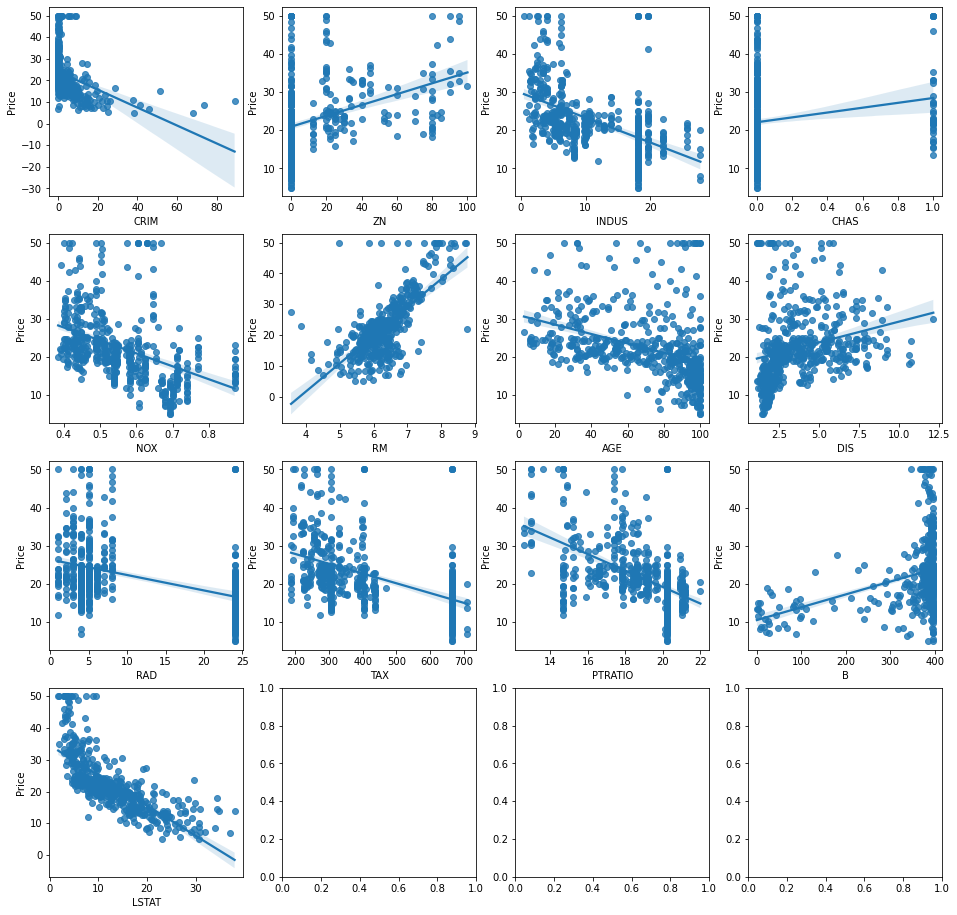

In [17]:
# Make subplots(3 rows and 4 cols)
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4)
features = boston.feature_names
for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='Price', data=boston_df, ax=axs[row][col])

From above regplots, we can see RM, LSTAT have high relation with Price.  
RM has positive Linearity and LSTAT has negative Linearity

In [28]:
y_target= boston_df['Price']
x_features = boston_df.drop(['Price'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3)

# Start Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_preds = LR.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
R_squared = r2_score(y_test, y_preds)

print('MSE: {:.4f}, RMSE: {:.4f}'.format(mse, rmse))
print('R2 Score: {}'.format(R_squared))

MSE: 14.4532, RMSE: 3.8017
R2 Score: 0.8037525156418057


In [29]:
print('Intercept Value: {:.4f}'.format(LR.intercept_))
print('Coefficients: ', np.round(LR.coef_, 1))

Intercept Value: 39.0386
Coefficients:  [ -0.1   0.1   0.    3.  -21.4   3.7   0.   -1.7   0.3  -0.   -0.9   0.
  -0.5]


In [30]:
coef_df = pd.Series(data=np.round(LR.coef_, 1), index=x_features.columns)
coef_df.sort_values(ascending=False)

RM          3.7
CHAS        3.0
RAD         0.3
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.7
NOX       -21.4
dtype: float64

In [31]:
from sklearn.model_selection import cross_val_score

LR = LinearRegression()

# scoring=neg_mean_squared_error return -(mse_score)
neg_mse_score = cross_val_score(LR, x_features, y_target, scoring='neg_mean_squared_error', cv=5)
mse_score = -neg_mse_score
rmse_score = np.sqrt(mse_score) #

avg_mse = np.mean(mse_score)
avg_rmse = np.mean(rmse_score)

print('MSE Scores for each 5 folds:', np.round(mse_score, 2))
print('RMSE Scores for each 5 folds:', np.round(rmse_score, 2))
print('Mean of RMSE Scores:', avg_rmse)

MSE Scores for each 5 folds: [12.46 26.05 33.07 80.76 33.31]
RMSE Scores for each 5 folds: [3.53 5.1  5.75 8.99 5.77]
Mean of RMSE Scores: 5.828658946215808
